## Config

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from punisher.common import *

## Helpers

In [2]:
def plot_price(df, field, asset, ex_id):
    col_name = ohlcv_feed.get_col_name(field, asset.symbol, ex_id)
    punisher.utils.charts.plot_range(
        df, start=None, end=None, 
        column_name=col_name)

## Exchange Price Arbitrage

* Absolute price different
* Does one exchange lead the other?
* BTC looks well arbitraged, but perhaps other assets?

In [47]:
# https://coinmarketcap.com/api/
from datetime import datetime
exchange_ids = [ex_cfg.GDAX, ex_cfg.BINANCE]#, ex_cfg.POLONIEX]
symbols = ['BTC/USD','BTC/USDT']
assets = [Asset.from_symbol(sym) for sym in symbols]
start = datetime(year=2018, month=1, day=1)
timeframe = Timeframe.ONE_MIN
downloaded_df = ohlcv_feed.load_multiple_assets(exchange_ids, assets, timeframe, start, end=None)

Fpath does not exist: .data/gdax_BTC_USDT_1m.csv
Fpath does not exist: .data/binance_BTC_USD_1m.csv


In [55]:
columns = ['close_BTC/USD_gdax','close_BTC/USDT_binance','utc']
df = downloaded_df.copy()[columns]
df = df.rename(mapper={columns[i]:exchange_ids[i] for i in range(len(columns)-1)}, axis='columns')
df.head()

,gdax,binance,utc
epoch,,,
1514764800,13863.78,13707.92,2018-01-01 00:00:00
1514764860,13879.73,13694.92,2018-01-01 00:01:00
1514764920,13852.00,13680.00,2018-01-01 00:02:00
1514764980,13822.39,13645.99,2018-01-01 00:03:00
1514765040,13803.00,13600.00,2018-01-01 00:04:00


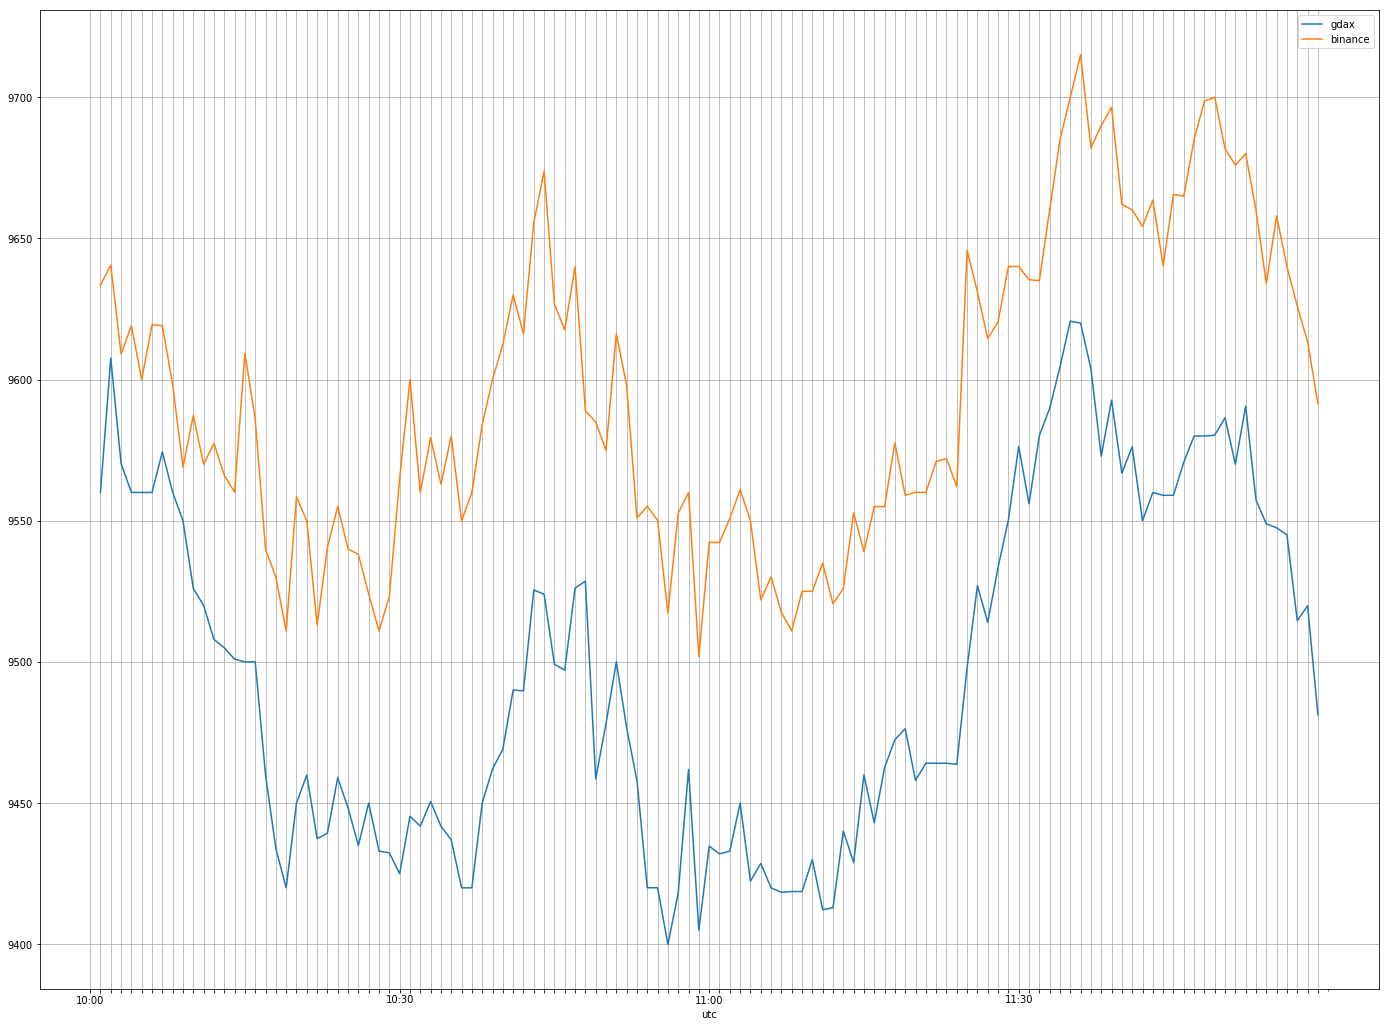

In [56]:
start = datetime(year=2018, month=2, day=1, hour=10)
end = datetime(year=2018, month=2, day=1, hour=12)
times = [datetime(year=2018, month=2, day=1, hour=10, minute=i) for i in range(60)] + [datetime(year=2018, month=2, day=1, hour=11, minute=i) for i in range(60)]
df = df[(df['utc'] > start) & (df['utc'] < end)]
df.plot(x='utc', figsize=(24,18), xticks=times, grid=True)

## Asset Price Arbitrage

* Does one asset lead the other?
* Is some combination of assets mispriced (e.g. LTC/BTC trading below LTC/USD over BTC/USD)